# 프로그래밍3 week05 과제
### 데이터사이언스학부 201884045 배상원

## 과제 

fueleco 데이터를 사용하여 몇가지 컬럼들에 대해서 자유롭게 그래프를 그려보기(이 상황에서는 이런 그래프를 그릴 수 있구나 확인)

다음으로 수치형 컬럼들 중 몇가지를 선택해서 corr에 히트맵을 그려보기

In [1]:
#필요한 import
import pandas as pd
import numpy as np

In [2]:
fueleco = pd.read_csv('data/vehicles.csv.zip')
fueleco

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43413,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43414,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43415,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43416,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
fueleco.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,43418.0,17.132865,4.678481,0.06,14.330870,16.48050,19.388824,47.087143
barrelsA08,43418.0,0.221869,1.142116,0.00,0.000000,0.00000,0.000000,18.311667
charge120,43418.0,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
charge240,43418.0,0.066276,0.739613,0.00,0.000000,0.00000,0.000000,15.300000
city08,43418.0,18.654521,8.750168,6.00,15.000000,17.00000,21.000000,150.000000
city08U,43418.0,6.916080,12.657711,0.00,0.000000,0.00000,15.877425,150.195800
cityA08,43418.0,0.780805,6.050073,0.00,0.000000,0.00000,0.000000,145.000000
cityA08U,43418.0,0.643413,5.939123,0.00,0.000000,0.00000,0.000000,145.083500
cityCD,43418.0,0.000497,0.038230,0.00,0.000000,0.00000,0.000000,5.350000
cityE,43418.0,0.471792,4.683147,0.00,0.000000,0.00000,0.000000,122.000000


In [4]:
# object 타입 include 활용
fueleco.describe(include=object).T

,count,unique,top,freq
drive,42232,7,Front-Wheel Drive,14776
eng_dscr,26887,562,(FFS),8827
fuelType,43418,14,Regular,27381
fuelType1,43418,6,Regular Gasoline,28828
make,43418,139,Chevrolet,4159
model,43418,4375,F150 Pickup 2WD,226
mpgData,43400,2,N,29726
trany,43407,40,Automatic 4-spd,11048
VClass,43418,34,Compact Cars,6086
guzzler,2558,3,G,1579


In [5]:
fueleco.dtypes.value_counts()

float64    32
int64      27
object     23
bool        1
dtype: int64

In [6]:
# object type 확인
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [7]:
# fuelType1를 선택
fueleco.fuelType1.nunique()

6

unique값이 6개 밖에 없다. 이런 경우 시각화하기 좋은 데이터다. 

In [8]:
fueleco.fuelType1.value_counts()

Regular Gasoline     28828
Premium Gasoline     12921
Diesel                1203
Electricity            276
Midgrade Gasoline      130
Natural Gas             60
Name: fuelType1, dtype: int64

# fueleco 데이터를 사용하여 몇가지 컬럼들에 대해서 자유롭게 그래프를 그려보기

## Bar Chart 그리기

<AxesSubplot:>

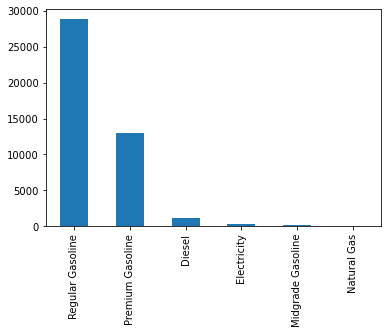

In [9]:
fueleco.fuelType1.value_counts().plot(kind='bar')

아래와 같이 plot(kind='bar') 대신 plot.bar()을 사용해도 같은 결과가 나온다.

<AxesSubplot:>

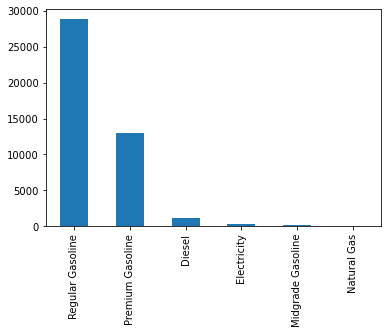

In [10]:
fueleco.fuelType1.value_counts().plot.bar()

## matplotlib을 이용하는 방법

<BarContainer object of 6 artists>

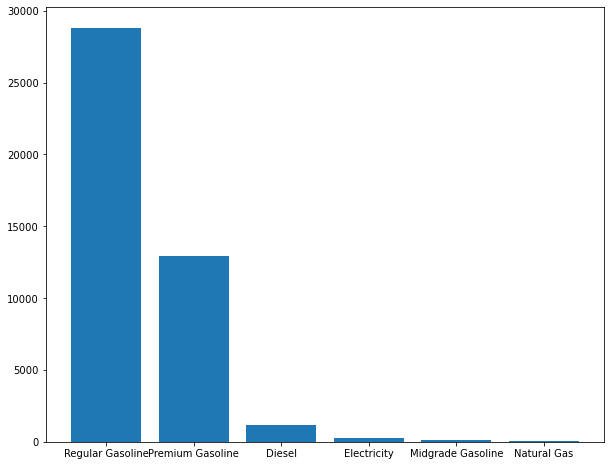

In [11]:
# matplotlib을 이용하는 방법
import matplotlib.pyplot as plt

# figsize는 그림의 사이즈를 조정  
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(fueleco.fuelType1.value_counts().index, fueleco.fuelType1.value_counts())

## seaborn을 이용하는 방법
seaborn은 matplotlib에 비해 색이나 구현의 세부적인옵션이 다양

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='fuelType1'>

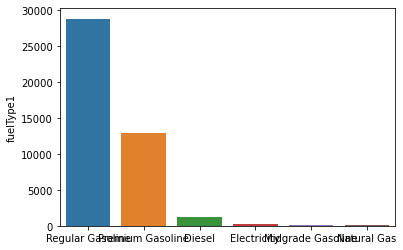

In [12]:
#seaborn을 이용하는 방법

import seaborn as sns
sns.barplot(fueleco.fuelType1.value_counts().index, fueleco.fuelType1.value_counts())

Vclass 데이터는 Length가 34로 너무 많아서 그래프로 표현하기에 어려움 그래서 최대값 n개를 선택하는 방법을 사용

In [13]:
fueleco.VClass.value_counts()

Compact Cars                          6086
Subcompact Cars                       5381
Midsize Cars                          5184
Large Cars                            2359
Standard Pickup Trucks                2354
Two Seaters                           2215
Sport Utility Vehicle - 4WD           2078
Small Station Wagons                  1662
Sport Utility Vehicle - 2WD           1627
Special Purpose Vehicles              1455
Minicompact Cars                      1452
Standard Pickup Trucks 2WD            1333
Standard Pickup Trucks 4WD            1190
Small Sport Utility Vehicle 4WD       1152
Vans                                  1141
Standard Sport Utility Vehicle 4WD     911
Small Sport Utility Vehicle 2WD        759
Special Purpose Vehicle 2WD            698
Midsize-Large Station Wagons           656
Midsize Station Wagons                 566
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                485
Vans, Cargo Type                       438
Minivan - 2

In [14]:
# 최대값 6개를 선택하는 방법
top_n = fueleco.VClass.value_counts().index[:6]

In [15]:
top_n

Index(['Compact Cars', 'Subcompact Cars', 'Midsize Cars', 'Large Cars',
       'Standard Pickup Trucks', 'Two Seaters'],
      dtype='object')

In [16]:
(
    fueleco.assign(VClass=fueleco.VClass.where(fueleco.VClass.isin(top_n), 'Other'))
    .VClass.value_counts()
)
# where 는 조건에 맞지 않는 값을 다른 값으로 바꾸는 함수

Other                     19839
Compact Cars               6086
Subcompact Cars            5381
Midsize Cars               5184
Large Cars                 2359
Standard Pickup Trucks     2354
Two Seaters                2215
Name: VClass, dtype: int64

<AxesSubplot:>

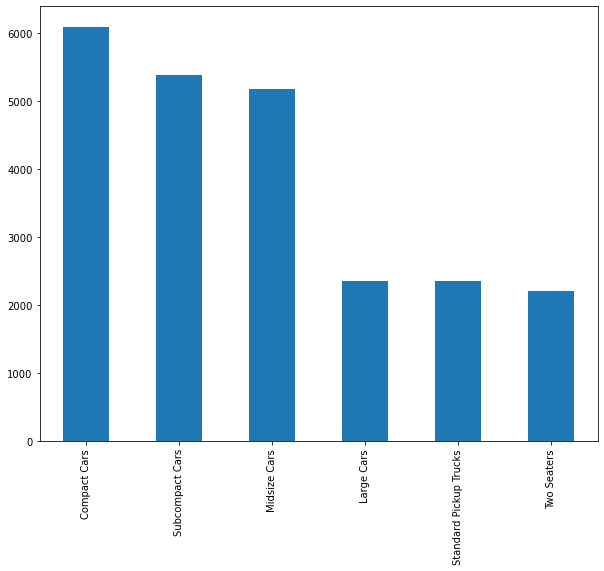

In [17]:
# Other을 제외한 나머지 6개를 선택하여 그래프를 만들기
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.VClass.value_counts().index[:6]
(
    fueleco.assign(
    VClass = fueleco.VClass.where(
    fueleco.VClass.isin(top_n), 'Other'))
    .VClass.value_counts()[1:]
    .plot.bar(ax=ax)
)

## countplot을 사용한 방법

In [18]:
fueleco.fuelType.value_counts()

Regular                        27381
Premium                        12637
Gasoline or E85                 1352
Diesel                          1203
Electricity                      276
Midgrade                         130
Premium or E85                   127
Premium and Electricity          100
Regular Gas and Electricity       63
CNG                               60
Premium Gas or Electricity        57
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='count', ylabel='fuelType'>

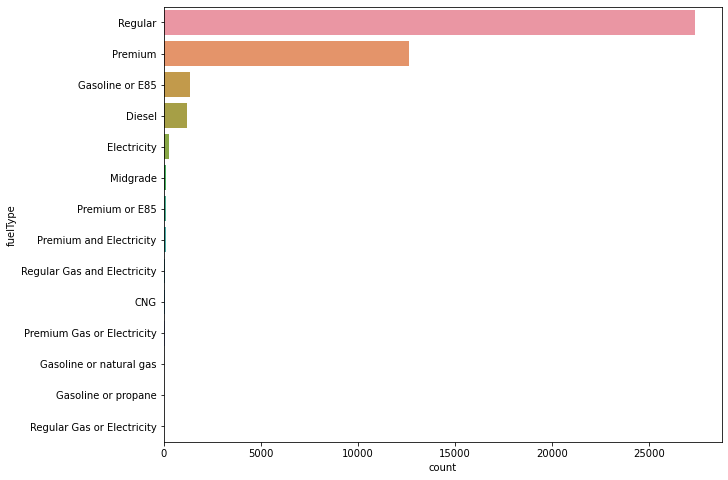

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='fuelType', data=(fueleco), order=fueleco.fuelType.value_counts().index)

In [20]:
fueleco.drive.value_counts().head()

Front-Wheel Drive             14776
Rear-Wheel Drive              14409
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                3788
4-Wheel Drive                  1788
Name: drive, dtype: int64

<AxesSubplot:xlabel='count', ylabel='drive'>

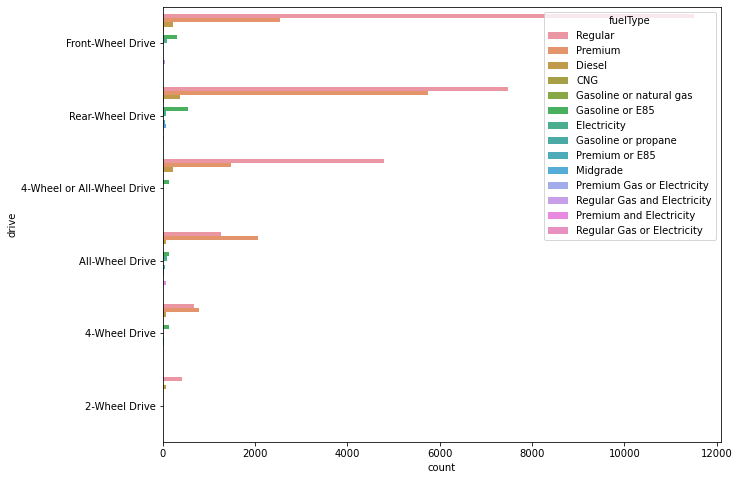

In [21]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.drive.value_counts().index[:6]
sns.countplot(y='drive',
             data=(fueleco[fueleco.drive.isin(top_n)])
             , hue='fuelType', order=fueleco.drive.value_counts().index[:6]
             #, dodge=False
             )

fuelType이 Regular인 것이 대부분인데 반해 All-Wheel Drive와 4-Wheel Drive는 Premium의 값이 더 큰 것을 알 수 있다.

<AxesSubplot:xlabel='highway08', ylabel='Count'>

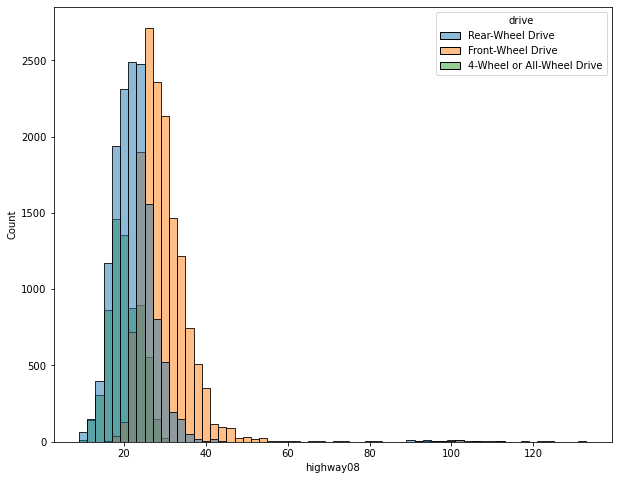

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.drive.value_counts().index[:3]
sns.histplot(x='highway08',
           data=(fueleco[fueleco.drive.isin(top_n)]), hue='drive', binwidth=2,
           ax=ax)

In [23]:
# atvType의 na값 확인
fueleco.atvType.isna().sum()

39431

In [24]:
#value_counts 에서 dropna=False 를 주면, na값을 다른 값의 수와 비교하기 쉬움
fueleco.atvType.value_counts(dropna=False)

NaN               39431
FFV                1479
Diesel             1131
Hybrid              799
EV                  276
Plug-in Hybrid      224
CNG                  50
Bifuel (CNG)         20
Bifuel (LPG)          8
Name: atvType, dtype: int64

<AxesSubplot:>

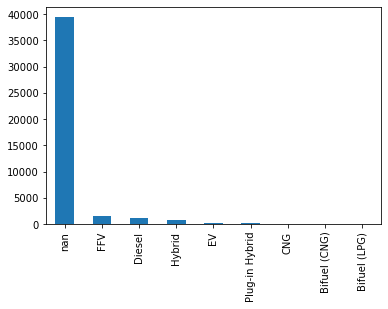

In [25]:
# 간단한 플롯인 경우, plt 나 sns을 사용하지 않고, pandas 의 plot 을 사용
fueleco.atvType.value_counts(dropna=False).plot(kind='bar')

## Object 형태 -> 수치형

In [26]:
fueleco.rangeA.value_counts(dropna=False)

NaN        41692
290           74
270           58
280           56
310           41
           ...  
362/537        1
337/501        1
286            1
341            1
301            1
Name: rangeA, Length: 236, dtype: int64

In [27]:
# 362/537 같은 이상한 데이터와 NA 값도 많음
# 값 안에 숫자가 아닌 것을 찾기 위해서, 정규표현식 사용

(
    # ^ 는 not 의 의미 그러니까 숫자와 . 을 뺀 문자를 표현
    fueleco.rangeA.str.extract(r'([^0-9.])')
    .dropna() # na 값 버리기
    #.apply(lambda row: ''.join(row), axis=1)
    .value_counts()
)

/    323
-     71
dtype: int64

In [28]:
set(fueleco.rangeA.apply(type))

{float, str}

In [29]:
(
    fueleco.rangeA.fillna('0')
    .str.replace('-', '/')
    .str.split('/', expand=True)
    .astype(float)
    .mean(axis=1)
    .pipe(lambda ser_: pd.cut(ser_, 10))
    .value_counts()
)

(-0.45, 44.95]     41889
(269.7, 314.65]      600
(314.65, 359.6]      379
(359.6, 404.55]      216
(224.75, 269.7]      187
(404.55, 449.5]       92
(89.9, 134.85]        21
(44.95, 89.9]         20
(179.8, 224.75]        9
(134.85, 179.8]        5
dtype: int64

이렇게 수치형으로 바꾼 것도 구간으로 나눠주면 범주형처럼 사용할 수 있음

pandas 에서는 수치의 범주화를 위해 크게 두 함수를 사용
* cut: 동일한 너비의 구간으로 나눔
* qcut: 분위수를 기준으로 나눔

<AxesSubplot:>

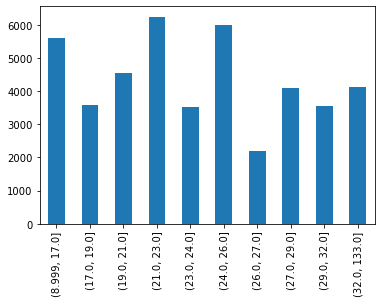

In [30]:
# qcut 사용방법
# 데이터는 highway08을 사용
(
    fueleco.highway08.pipe(
    lambda ser: pd.qcut(ser, q=10)
    ).value_counts()
    .sort_index()
    .plot.bar()
)

<AxesSubplot:ylabel='Frequency'>

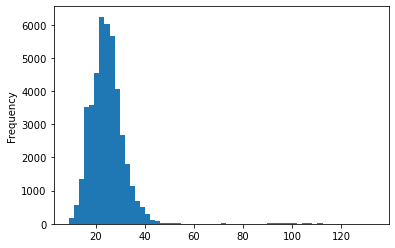

In [31]:
# 히스토그램 사용
fueleco.highway08.plot.hist(bins=60)

## 연속형 데이터(수치)를 이용한 방법

comb08를 사용

In [32]:
fueleco.comb08

0        21
1        11
2        27
3        11
4        19
         ..
43413    22
43414    23
43415    21
43416    21
43417    18
Name: comb08, Length: 43418, dtype: int64

In [33]:
# 원래는 연속형 데이터(수치)는 value_counts가 잘 않됨
fueleco.comb08.value_counts()

18     4065
19     3856
21     3767
20     3598
17     2835
       ... 
74        1
126       1
94        1
115       1
142       1
Name: comb08, Length: 109, dtype: int64

In [34]:
# describe값 확인
fueleco.comb08.describe()

count    43418.000000
mean        20.894997
std          8.401355
min          7.000000
25%         17.000000
50%         20.000000
75%         23.000000
max        142.000000
Name: comb08, dtype: float64

In [35]:
# na값 확인
fueleco.comb08.isna().sum()

0

<AxesSubplot:>

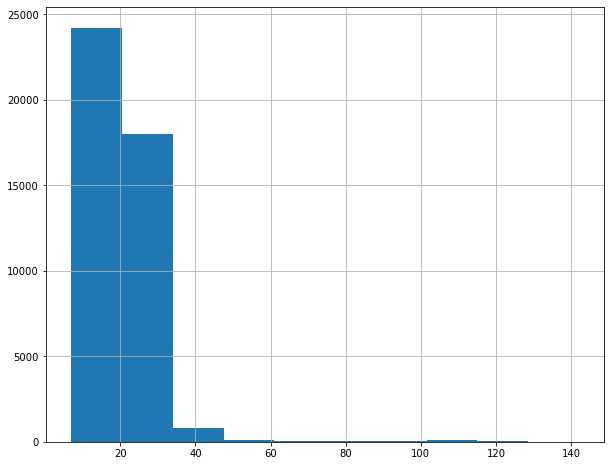

In [36]:
# histgram을 사용하여 그리기(수치형의 경우 histogram을 통해 표현하기 좋음)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.comb08.hist(ax=ax)
#plt.hist()

<AxesSubplot:>

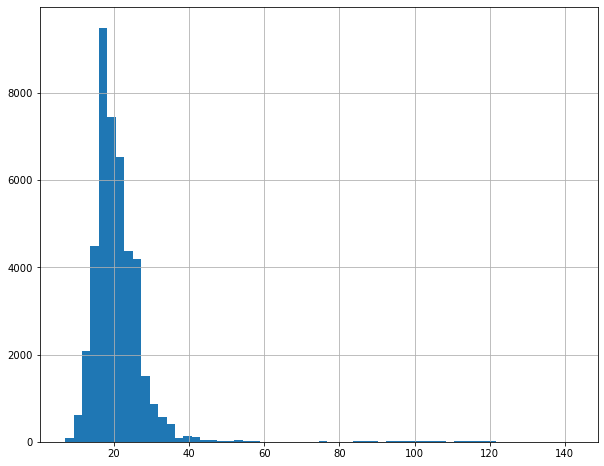

In [37]:
# 0~20 사이가 너무 두꺼워서 세부적 모양을 보기 어려울 때 bin의 개수를 늘리면 보기 편함
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.comb08.hist(ax=ax, bins=60)

<AxesSubplot:>

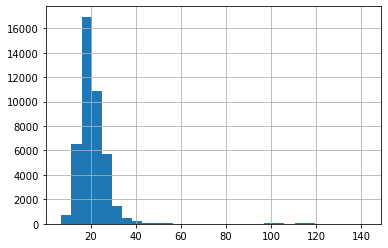

In [38]:
# 최종결과물이 아닐 경우 이 코드가 더 간편
fueleco.comb08.hist(bins=30)

<AxesSubplot:xlabel='Count', ylabel='comb08'>

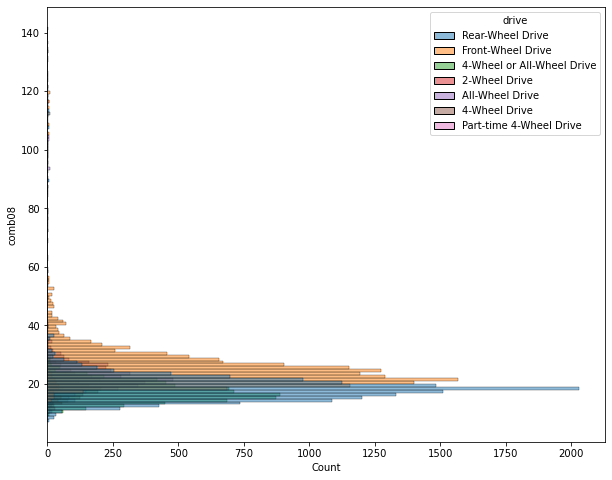

In [39]:
# seaborn 을 이용하면 더 다양한 정보가 들어간 그래프를 그릴 수 있음
# comb08, drive 사용

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=fueleco, y='comb08', hue='drive', ax=ax, binwidth=1)

## boxplot, violinplot, boxenplot 그리기

<AxesSubplot:xlabel='comb08'>

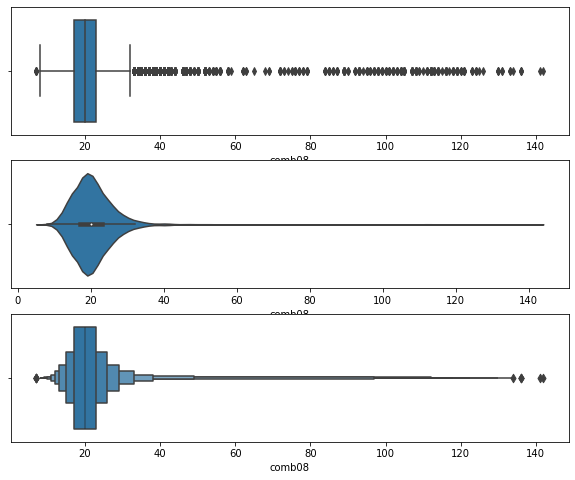

In [40]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 8))
sns.boxplot(x=fueleco.comb08, ax=axs[0])
sns.violinplot(x=fueleco.comb08, ax=axs[1])
sns.boxenplot(x=fueleco.comb08, ax=axs[2])

In [41]:
# 데이터의 정규성을 검정하려면 SciPy의 kstest 를 사용
# kstest 에서 pvalue 가 0.05 이하라면 데이터는 정규분포가 아니다.

from scipy import stats
stats.kstest(fueleco.barrels08, cdf='norm')

KstestResult(statistic=0.991040847156501, pvalue=0.0)

((array([-4.15925471, -3.95199683, -3.83894277, ...,  3.83894277,
          3.95199683,  4.15925471]),
  array([ 0.06      ,  0.06      ,  0.06      , ..., 47.08714286,
         47.08714286, 47.08714286])),
 (4.594073489329083, 17.13286478232145, 0.9818770745376701))

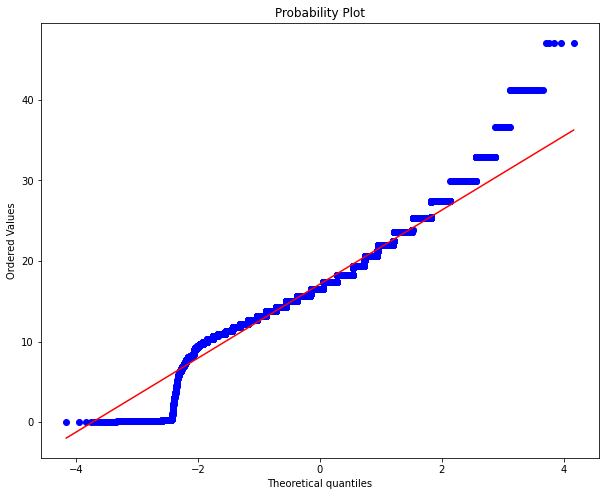

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco.barrels08, plot=ax)

## 범주간 연속값 비교를 통해 그리기

make별로 city08을 비교

In [43]:
fueleco.make.value_counts()

Chevrolet                        4159
Ford                             3508
Dodge                            2632
GMC                              2599
Toyota                           2189
                                 ... 
Panos                               1
London Taxi                         1
ASC Incorporated                    1
Fisker                              1
Import Foreign Auto Sales Inc       1
Name: make, Length: 139, dtype: int64

In [44]:
mask = fueleco.make.isin(['Chevrolet', 'Ford', 'Dodge', 'Toyota'])

fueleco[mask].groupby('make').highway08.agg(['mean', 'std', 'min', 'max']) #agg로 집계함수를 넘겨줄 수 있음

,mean,std,min,max
make,,,,
Chevrolet,22.826641,7.187250,10,110
Dodge,20.852204,5.783090,10,39
Ford,22.706956,7.566505,10,99
Toyota,25.953860,7.632748,10,74


위 결과를 시각화

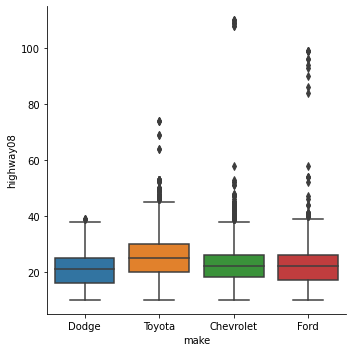

In [45]:
sns.catplot(x='make', y='highway08', data=fueleco[mask], kind='box')

boxplot을 사용

위의 그림은 변수를 그룹별로 비교하기 쉽다는 장점이 있지만 각 그룹별 샘플 사이즈는 고려하지 않는다는 단점이 있다.

In [46]:
fueleco[mask].groupby('make').highway08.count()

make
Chevrolet    4159
Dodge        2632
Ford         3508
Toyota       2189
Name: highway08, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='make', ylabel='highway08'>

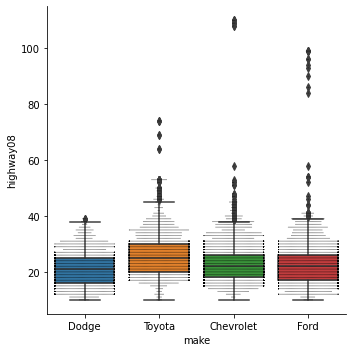

In [47]:
# 위의 boxplot 에서 이 정보를 넣기 위해 swamplot 을 추가하는 방법

g = sns.catplot(x='make', y='highway08', data=fueleco[mask], kind='box')
sns.swarmplot(x='make', y='highway08', data=fueleco[mask], color='k', size=1, ax=g.ax, alpha=.5)

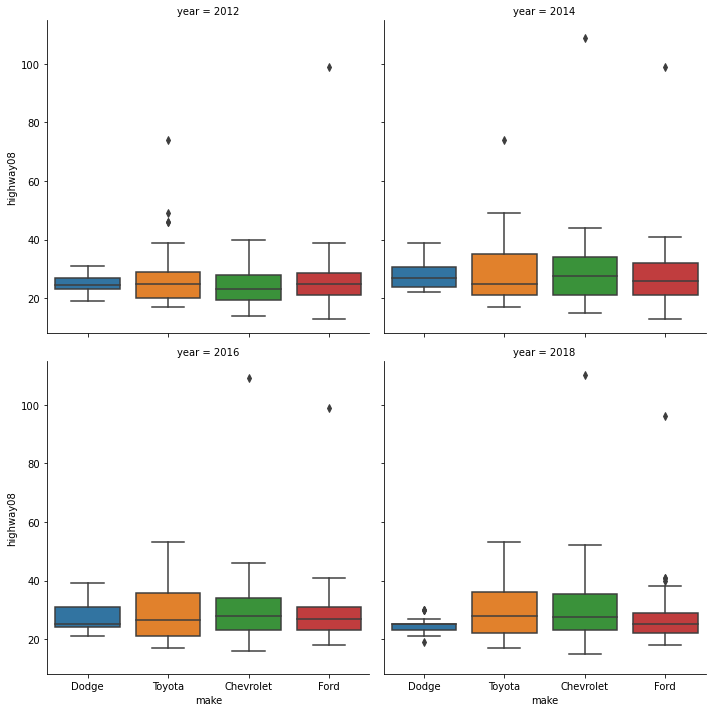

In [48]:
# boxplot 을 조금 더 활용하면 더 많은 그래프를 손쉽게 그릴 수 있다.
# col 을 설정하면 연도별로 그려짐

sns.catplot(
    x='make',
    y='highway08',
    data=fueleco[mask],
    kind='box',
    col='year',
    col_order=[2012, 2014, 2016, 2018], #연도의 증장 순서 결정
    col_wrap=2 # 몇 줄로 만들 것인지 결정
)

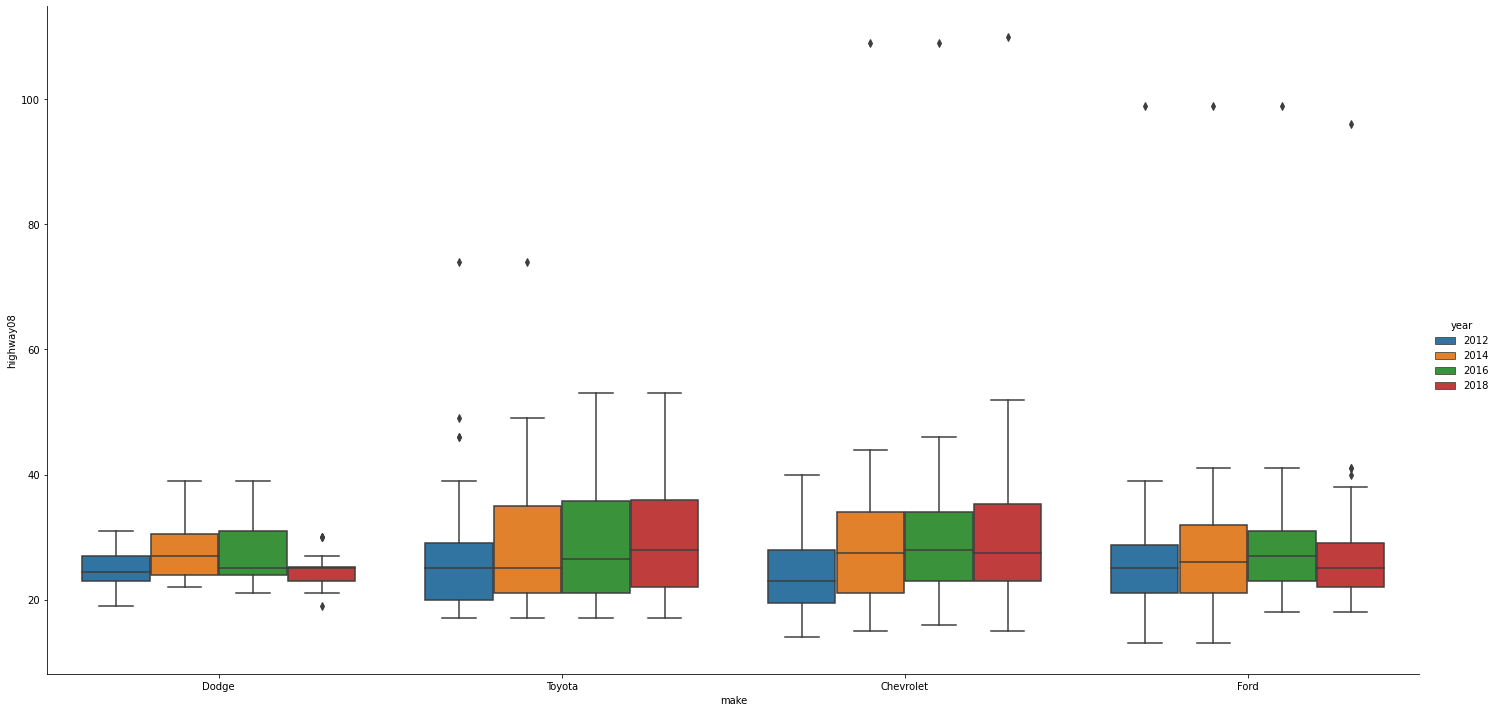

In [49]:
# 하나의 그래프에 색을 추가해서 그리는 방법
# hue를 사용

sns.catplot(
    x='make',
    y='highway08',
    data=fueleco[mask],
    kind='box',
    hue='year',
    hue_order=[2012, 2014, 2016, 2018],
    height=10, aspect=2 # 크기조절하는 부분
)

# 수치형 컬럼들 중 몇가지를 선택해서 corr에 히트맵을 그려보기

일반적으로 상관계수라 하면 선형 관계를 가정하는 Pearson's Correlation을 의미

두 개의 열(혹은 변수)이 선형적으로 얼마나 같이(혹은 다르게) 변하는지를 보는 것

값은 -1 ~ 1 사이이고, -1일때 정반대로, 1일때 정확하게 동일하게 움직인다.

comb08, city08, highway08, cylinders, displ의 연속열 비교

In [50]:
# comb08과 city08 의 관계 확인
fueleco.comb08.cov(fueleco.city08)

72.87615362639814

In [51]:
# comb08과 highway08 의 관계 확인
fueleco.comb08.cov(fueleco.highway08)

68.034962451601

In [52]:
# comb08과 displ 의 관계 확인
fueleco.comb08.cov(fueleco.displ)

-5.338439888815593

In [53]:
# comb08과 cylinders 의 관계 확인
fueleco.comb08.cov(fueleco.cylinders)

-6.497222785115751

In [54]:
# 상관계수는 corr 로 구한다.
fueleco.comb08.corr(fueleco.city08)

0.9913332735111903

In [55]:
fueleco[['comb08', 'city08', 'highway08', 'cylinders', 'displ']].corr()

,comb08,city08,highway08,cylinders,displ
comb08,1.000000,0.991333,0.977566,-0.685856,-0.730505
city08,0.991333,1.000000,0.945944,-0.683170,-0.716592
highway08,0.977566,0.945944,1.000000,-0.647252,-0.708367
cylinders,-0.685856,-0.683170,-0.647252,1.000000,0.904771
displ,-0.730505,-0.716592,-0.708367,0.904771,1.000000


In [57]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

<AxesSubplot:>

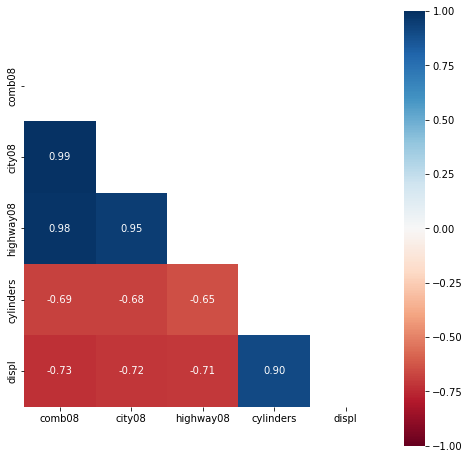

In [56]:
# 여러 변수의 corr를 한 번에 그리기 위한 작업

fig, ax = plt.subplots(figsize=(8, 8))
corr = fueleco[['comb08', 'city08', 'highway08', 'cylinders', 'displ']].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr,
    mask=mask,
    fmt='.2f', #소수점 2번자리 까지 표현
    annot=True, #데이터 표현
    ax=ax,
    cmap='RdBu', #색결정
    vmin=-1, 
    vmax=1, 
    square=True #정사각형으로 표현
)